## <font color=red> Multiple Linear Regression
   
   
<center> 
<img src="https://images.unsplash.com/photo-1498262257252-c282316270bc?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3264&q=80" alt="" style="margin:0% 0px -2% 0px;" width=300>
</center>    
    
Photo by <a href="https://unsplash.com/@erikeae?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Erik Eastman</a> on <a href="https://unsplash.com/photos/-6zFVL4YuaM?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## Last lecture

### SLR: definition, estimation and inference

- We view examples where a linear regression can be used to study the relationship between a response variable and input variables of different types


- We discussed and identified different uses of linear regression models (estimation vs inference vs prediction) 


- We defined a simple linear regression (SLR, a linear regression with only one input variable)


- We defined, interpreted and visualized the different terms of a linear regression


- We learned that least squares is a method that can be used to estimate a linear regression using data


- We learned two different ways to make inference in the context of SLR: 
    
    - using theoretical results or using bootstrapping 
    

- We used computer scripts for **estimation** and **inference** tasks in a SLR analysis


## This lecture

### Multiple Linear Regression (MLR)

This week we are going to "unleash" the scope of linear regression models and use them to study the association between a continuous response and *many* input variables of *different types*!! 

A linear regression model with many input variables is usually called a **Multiple Linear Regression (MLR)**.

> **Heads up**: Multiple Linear Regression is not the same as Multivariate Linear Regression. The latter refers to a regression with a multivariate response variable (beyond the scope of this course)!! 


**1. Categorical input variables with 2 or more levels**


**2. Additive MLR: with different type of input variables**


**3. MLR with interaction terms: interactions between continuous and categorical input variables**

## Learning Objectives 

By the end of this lecture you will be able to:

1. Give an example of a real problem that that could be answered by a multiple linear regression.

2. Interpret the coefficients and $p$-values of different types of input variables, including categorical input variables.

3. Define interactions in the context of linear regression.

4. Write a computer script to perform linear regression when input variables are continuous or discrete, and when there are interactions between some of these variables.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(AER)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:



In [2]:
US_cancer_data <- read_csv("data/US_county_cancer_data.csv") %>%
  select(TARGET_deathRate, povertyPercent, PctPrivateCoverage, Geography)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1. Categorical input variables

In previous courses you've learned that a categorical variables creates groups (levels) and you can study how another variable differ among these groups.

> for example: does the size of the donations depend on the variation of a website?

**You can extend this notion to LR, is the linear relation the same among groups?** 
<br>

<center>
<img src="https://images.unsplash.com/photo-1531376653594-e9bcf0f0c65b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2077&q=80" alt="" style="margin:0% 0px -2% 0px;" width=400>
    

Photo by <a href="https://unsplash.com/@tomas_nz?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tomas Sobek</a> on <a href="https://unsplash.com/photos/nVqNmnAWz3A?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

Let's use the `US_cancer_data` to explore if the cancer mortality differ by states. 

> Note: the original `US_county_cancer_data` does not contain a specific column for the state where each county belongs, so we'll get that information from the variable `Geography` using code to split strings.

In [3]:
US_cancer_data$state <- sapply(strsplit(US_cancer_data$Geography, ", "), "[", 2)  

In [4]:
head(US_cancer_data,3)

TARGET_deathRate,povertyPercent,PctPrivateCoverage,Geography,state
<dbl>,<dbl>,<dbl>,<chr>,<chr>
164.9,11.2,75.1,"Kitsap County, Washington",Washington
161.3,18.6,70.2,"Kittitas County, Washington",Washington
174.7,14.6,63.7,"Klickitat County, Washington",Washington


### 1.1. One categorical variable with 2 levels

Let's start by comparing the mortality rates in 2 states: *Washington* vs *Indiana*. 

In [5]:
WI_cancer_data <- US_cancer_data %>%filter(state %in% c("Washington", "Indiana"))%>% 
                            droplevels()

WI_cancer_data$state <- as.factor(WI_cancer_data$state)

### Visualization

In [6]:
TARGET_deathRate_boxplots <- WI_cancer_data %>%
  ggplot() +
  geom_boxplot(aes(state, TARGET_deathRate, fill = state)) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Boxplots of Cancer Mortality by States") +
  xlab("State") +
  ylab("Cancer Mortality per Capita (cases/100,000)") +
  stat_summary(aes(state, TARGET_deathRate, fill = state),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

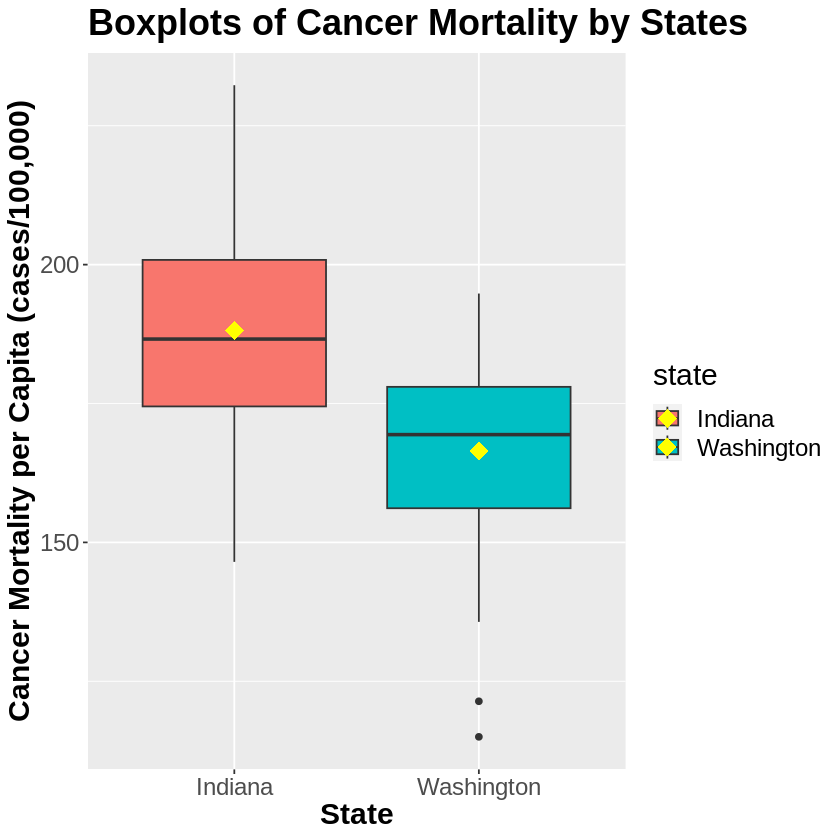

In [7]:
TARGET_deathRate_boxplots

The side-by-side boxplots in `TARGET_deathRate_boxplots` show some difference in mortality rates between these two states. 

**Can we use a linear regression to study the variation of mortality between different states??!!**

The linear regression equation is:

$$Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,$$

here, the response $Y_i$ is `TARGET_deathRate` and we use $i$ to identify the $i$th state 

The regression coefficients $\beta_0$ and $\beta_1$ are the **true and unknown** coefficients we want to estimate. 

<font color=blue>**But the $x$-axis in `TARGET_deathRate_boxplots` is not numeric: Indiana vs Washington** </font>

There's not a *line* in this case!! However, we can still call use a "linear regression"!! **How??**

> **Trick**: we will use an *auxiliary* numeric variable to represent the levels of a categorical variable: *a dummy variable*

The function `lm` creates this variable for you if you indicate that the input variable (in our case `state`) is a *factor*!!

### Dummy variables


What is a dummy variable? It is a *numerical variable* that could either take on the values $0$ or $1$. For this specific example, for the $i$th state, $X_i$ can be defined as follows:

$$\text{stateWashington}_i=X_i = \left\{ \begin{array}{ll}
         1 & \text{if the county is in "Washington"};\\
         0 & \text{if otherwise}\end{array} \right.$$

> **Heads-up:** The level in the dummy variable corresponding to the value of $0$ is called the *reference (or baseline) level*

#### Code

If `state` is a factor, `lm` creates these dummy variables for you!
- `lm` calls the dummy variable `stateWashington` (name of the variable followed by the level corresponding to 1)


- The reference level (dummy variable = 0, level "left out") is "Indiana", chosen alphabetically.

In [8]:
WI_data_LR <- tidy(lm(TARGET_deathRate ~ state,
                  data = WI_cancer_data))  %>% mutate_if(is.numeric, round, 3)

In [9]:
WI_data_LR

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),188.121,1.825,103.074,0
stateWashington,-21.628,3.345,-6.466,0


**The inclusion of the dummy variable creates 2 groups**

- For counties in Indiana, $X_i=0$, then $Y_i = \beta_0 + \beta_1 \times 0 + \varepsilon_i $

$$Y_i = \beta_0 + \varepsilon_i$$
<br>

- For counties in Washington, $X_i=1$, then $Y_i = \beta_0 + \beta_1 \times 1 + \varepsilon_i$

$$Y_i = \beta_0 + \beta_1 + \varepsilon_i$$
<br>

### Interpretation: 

**A bit of math to understand the meaning of the coefficients**

- For counties in Indiana, $X_i=0$, 

$$E[Y_i|X_i=0] = \beta_0$$

**Important**: $\beta_0$ is the **mean of the response for the *reference* level** of the input variable. 

> for example, the mean mortality rate in Indiana


- For counties in Washington, $X_i=1$, 

$$E[Y_i|X_i=1] = \beta_0 + \beta_1$$

Note that 

$$\beta_1 = E[Y_i|X_i=1] - E[Y_i|X_i=0]$$
    
**Important**: $\beta_1$ is the ***difference* of means of the response between levels**. 

> for example, the difference between the mean mortality rate in Washington with respect to that in Indiana


Note that $\beta_0$ and $\beta_1$ in this particular case are *not* intercepts and slopes (even if `R` calls them that way)

In [10]:
WI_data_LR

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),188.121,1.825,103.074,0
stateWashington,-21.628,3.345,-6.466,0


#### Interpretation of the estimated coefficients

- The estimated $\hat{\beta}_0 = 188.121$, is the average (sample mean) mortality rate rate per capita in Indiana!!

> It is the sample version of the conditional expectation (mean of the reference group)

- The estimated $\hat{\beta}_1 = -21.628$ is the difference difference between the average mortality rate per capita in Washington and the average mortality rate per capita in Indiana.

> It is the sample version of the difference of the conditional expectations (or group means)

#### Note: that you have done these type of analyses in STAT201!! 

In [11]:
t.test(TARGET_deathRate ~ state,WI_cancer_data,var.equal=T)


	Two Sample t-test

data:  TARGET_deathRate by state
t = 6.4659, df = 129, p-value = 1.896e-09
alternative hypothesis: true difference in means between group Indiana and group Washington is not equal to 0
95 percent confidence interval:
 15.01026 28.24643
sample estimates:
   mean in group Indiana mean in group Washington 
                188.1207                 166.4923 


### This is not a coincidence! `lm` is running the *same* *t*-test!!

## 1.2 One categorical variable with more than 2 levels¶

But what do we do if the categorical variable has more levels??!

We need additional dummy variables! Dummy variables are comparisons to a *reference* level. Thus, we need more of these variables to compare all other levels with respect to the reference.

Suppose we want to compare "Indiana", "Washington" and "Kansas":

$$\text{stateWashington}_i=X_{1i} = \left\{ \begin{array}{ll}
         1 & \text{if the county is in "Washington"};\\
         0 & \text{if otherwise}\end{array} \right.$$
         
         
$$\text{stateKansas}_i=X_{2i} = \left\{ \begin{array}{ll}
         1 & \text{if if the county is in "Kansas"};\\
         0 & \text{if otherwise}\end{array} \right.$$
   

**Note that we need *two* dummy variable for 3 levels (2 levels compared to one reference level)**

- The reference level is the same for both dummy variables and equal to 0. 

- The other levels equal 1 in each dummy variable.

In [12]:
WIK_cancer_data <- US_cancer_data %>%filter(state %in% c("Indiana", "Washington", "Kansas"))%>% 
                            droplevels()

WIK_cancer_data$state <- as.factor(WIK_cancer_data$state)

str(WIK_cancer_data)

tibble [233 × 5] (S3: tbl_df/tbl/data.frame)
 $ TARGET_deathRate  : num [1:233] 165 161 175 195 144 ...
 $ povertyPercent    : num [1:233] 11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ PctPrivateCoverage: num [1:233] 75.1 70.2 63.7 58.4 61.6 60 49.5 55.8 55.5 69.9 ...
 $ Geography         : chr [1:233] "Kitsap County, Washington" "Kittitas County, Washington" "Klickitat County, Washington" "Lewis County, Washington" ...
 $ state             : Factor w/ 3 levels "Indiana","Kansas",..: 3 3 3 3 3 3 3 3 3 3 ...


In [13]:
WIK_data_LR <- tidy(lm(TARGET_deathRate ~ state,
                  data = WIK_cancer_data))  %>% mutate_if(is.numeric, round, 3)

In [14]:
WIK_data_LR

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),188.121,2.291,82.127,0
stateKansas,-20.286,3.159,-6.422,0
stateWashington,-21.628,4.198,-5.152,0


### Visualization

In [15]:
TARGET_deathRate_boxplots <- WIK_cancer_data %>%
  ggplot() +
  geom_boxplot(aes(state, TARGET_deathRate, fill = state)) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Boxplots of Cancer Mortality by States") +
  xlab("State") +
  ylab("Cancer Mortality per Capita (cases/100,000)") +
  stat_summary(aes(state, TARGET_deathRate, fill = state),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

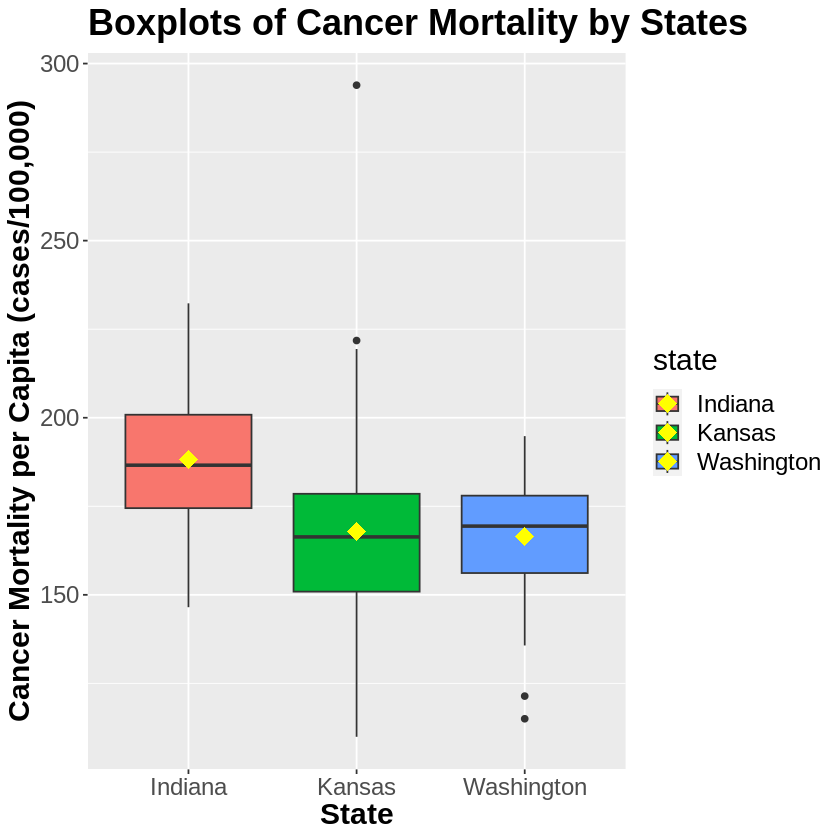

In [16]:
TARGET_deathRate_boxplots

**The inclusion of the 2 dummy variable creates 3 groups**

- For counties in Indiana, $X_i=0$, then $Y_i = \beta_0 + \beta_1 \times 0 + \beta_2 \times 0 +\varepsilon_i $

$$Y_i = \beta_0 + \varepsilon_i$$
<br>

- For counties in Washington, $X_i=1$, then $Y_i = \beta_0 + \beta_1 \times 1 +  \beta_2 \times 0 +\varepsilon_i$

$$Y_i = \beta_0 + \beta_1 + \varepsilon_i$$
<br>

- For counties in Kansas, $X_i=1$, then $Y_i = \beta_0 + \beta_1 \times 0 + \beta_2 \times 1 + \varepsilon_i$

$$Y_i = \beta_0 + \beta_2 + \varepsilon_i$$
<br>

### Interpretation: 

- $\beta_0$ is the mean of the response for the *reference* level of the input variable. In our case, the mean mortality rate in Indiana


- $\beta_1$ is the *difference* between the mean mortality rate in California and that in Indiana


- $\beta_2$ is the *difference* between the mean mortality rate in Kansas and that in Indiana

> **Note**: you can check numerically that the **estimates** of these parameters are based on the sample means!!

In [17]:
WIK_data_LR

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),188.121,2.291,82.127,0
stateKansas,-20.286,3.159,-6.422,0
stateWashington,-21.628,4.198,-5.152,0


## 2. MLR: additive models

Last week we studied the relation between mortality, `TARGET_deathRate`, percentage of the county's populace in poverty (`povertyPercent`) is possitively association. 

> Does this relation change among states??

**Should we study these relations separately or jointly using linear regressions?**

Categorical variables create groups to study these linear relations!

### 2.1 One continuous and one categorical input variables

There are different ways of adding variables in a LR: with or without interaction

When a variable is just added (without interaction), we assume that its association with the response **does not** depend on other variables

> For example, the expected change in mortality per percentage change in populace poverty is the same in all states


Let's continue with the example of the 2 states

$$Y_i = \beta_0 + \beta_1 \text{stateWashigton}_i + \beta_2 \text{povertyPercent}_i + \varepsilon_i,$$

<br>

Again, the dummy variable creates 2 groups and in this case 2 lines:

- For counties in Indiana, $Y_i = \beta_0 + \beta_1 \times 0 + \beta_2 \times \text{povertyPercent}_i  + \varepsilon_i$

<br>

$$Y_i = \beta_0 + \beta_2 \times \text{povertyPercent}_i + \varepsilon_i$$



- For counties in Washigton, $Y_i = \beta_0 + \beta_1 \times 1 + \beta_2 \times \text{povertyPercent}_i + \varepsilon_i $

<br>

$$Y_i= (\beta_0 + \beta_1) + \beta_2 \times \text{povertyPercent}_i  + \varepsilon_i$$

**Note**: that both lines have the same slope $\beta_2$!!

> We assumed that the expected change in mortality per percentage change in populace poverty is the same in both states

#### Interpretation: 

- $\beta_0$ is intercept of the *reference* line. 

<br>

- $\beta_1$ (coefficient of the dummy variable) is the *difference* between intercepts of both lines

<br>

- $\beta_2$ is the *common* slope of both lines

In [20]:
MLR_state_poverty_add <- tidy(lm(TARGET_deathRate ~ state + povertyPercent,
                  data = WI_cancer_data)) %>% mutate_if(is.numeric, round, 3)

In [21]:
MLR_state_poverty_add 

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),170.199,5.655,30.096,0.000
stateWashington,-24.542,3.337,-7.353,0.000
povertyPercent,1.300,0.390,3.334,0.001


#### NOTE: there are 3 coefficients for 2 lines because the additive model assumes a *common* slope!!

### 2.2 Adding continuous variables

We can also add continous variables in a MLR. For example, the mortality rate may also depend on the percentage of the population with private health coverage.

$$Y_i=\beta_0 + \beta_1 \text{povertyPercent}_i+ \beta_2 \text{PctPrivateCoverage}_i + \varepsilon_i$$

**Important**: we are again assuming that the expected change in the response per unit change in an input does not depend on the value of other variables!!


**For example:**

If we hold the poverty percentage, say at 15:

- the relationship between mortality and the percentage with private coverage is *linear*

$$Y_i=\beta_0 + \beta_1 15 + \beta_2 \text{PctPrivateCoverage}_i+ \varepsilon_i$$

- the slope $\beta_2$ *does not depend* on the value held constant

(and same for holding `PctPrivateCoverage` fix)

#### These models are called *additive*. Think about this assumptions when you solve exercises in the worksheet!

# What have we learned today?

- LR can include categorical variables

<br>

- Numerical variables (dummy variables) are created to represent the levels of categorical variables 

<br>

- Categorical variables create groups to analyze the linear associations within groups

<br>

- Additive models with a categorical variable assume common slopes, i.e., the expected change in the response per unit change in the input variable does not depend on the level of the categorical variable(s)

<br>

- Additive models assume (in general) that the expected change in the response per unit change in an input does not depend on the value of other variables!!